In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import numpy as np
from pathlib import Path
from collections import Counter
import pandas as pd
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
#  Import and read credit card fraud subset for part 1 of project
ccf_df = pd.read_csv("ModelUpload.S.csv")

# Preview the dataframe before pre-processing steps
ccf_df.head()

,Unnamed: 0,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [4]:
# Drop Unnamed column from dataset
ccf_df = ccf_df.drop(columns=['Unnamed: 0'])

# Preview updated dataframe
ccf_df.head()

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [5]:
# check data types on columns
ccf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trans_num   99999 non-null  object 
 1   merchant    99999 non-null  object 
 2   category    99999 non-null  object 
 3   amt         99999 non-null  float64
 4   gender      99999 non-null  object 
 5   city        99999 non-null  object 
 6   state       99999 non-null  object 
 7   zip         99999 non-null  int64  
 8   lat         99999 non-null  float64
 9   long        99999 non-null  float64
 10  city_pop    99999 non-null  int64  
 11  job         99999 non-null  object 
 12  unix_time   99999 non-null  int64  
 13  merch_lat   99999 non-null  float64
 14  merch_long  99999 non-null  float64
 15  is_fraud    99999 non-null  int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 12.2+ MB


In [6]:
#verify row and column counts
ccf_df.shape

(99999, 16)

In [7]:
#  Import and read personal info subset for part 1 of project
pi_df = pd.read_csv("Personal_Info.S.csv")

# Preview the dataframe before pre-processing steps
pi_df.head()

,Unnamed: 0,Pers_ID,trans_num,trans_date_trans_time,cc_num,first,last,street,dob
0,0,1,2da90c7d74bd46a0caf3777415b3ebd3,2020-06-21 12:14:00,2.290000e+15,Jeff,Elliott,351 Darlene Green,3/19/1968
1,1,2,324cc204407e99f51b0d6ca0055005e7,2020-06-21 12:14:00,3.570000e+15,Joanne,Williams,3638 Marsh Union,1/17/1990
2,2,3,c81755dbbbea9d5c77f094348a7579be,2020-06-21 12:14:00,3.600000e+15,Ashley,Lopez,9333 Valentine Point,10/21/1970
3,3,4,2159175b9efe66dc301f149d3d5abf8c,2020-06-21 12:15:00,3.590000e+15,Brian,Williams,32941 Krystal Mill Apt. 552,7/25/1987
4,4,5,57ff021bd3f328f8738bb535c302a31b,2020-06-21 12:15:00,3.530000e+15,Nathan,Massey,5783 Evan Roads Apt. 465,7/6/1955


In [8]:
# Drop Unnamed column from dataset
pi_df = pi_df.drop(columns=['Unnamed: 0'])

#Converting trans_date_trans_time to datetime
pi_df["trans_date_trans_time"] = pd.to_datetime(pi_df["trans_date_trans_time"])

#Extract hour of transaction and create new column
pi_df['hour'] = pi_df.trans_date_trans_time.dt.hour

# Preview updated dataframe
pi_df.head()

,Pers_ID,trans_num,trans_date_trans_time,cc_num,first,last,street,dob,hour
0,1,2da90c7d74bd46a0caf3777415b3ebd3,2020-06-21 12:14:00,2.290000e+15,Jeff,Elliott,351 Darlene Green,3/19/1968,12
1,2,324cc204407e99f51b0d6ca0055005e7,2020-06-21 12:14:00,3.570000e+15,Joanne,Williams,3638 Marsh Union,1/17/1990,12
2,3,c81755dbbbea9d5c77f094348a7579be,2020-06-21 12:14:00,3.600000e+15,Ashley,Lopez,9333 Valentine Point,10/21/1970,12
3,4,2159175b9efe66dc301f149d3d5abf8c,2020-06-21 12:15:00,3.590000e+15,Brian,Williams,32941 Krystal Mill Apt. 552,7/25/1987,12
4,5,57ff021bd3f328f8738bb535c302a31b,2020-06-21 12:15:00,3.530000e+15,Nathan,Massey,5783 Evan Roads Apt. 465,7/6/1955,12


In [9]:
# check data types on columns
pi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Pers_ID                99999 non-null  int64         
 1   trans_num              99999 non-null  object        
 2   trans_date_trans_time  99999 non-null  datetime64[ns]
 3   cc_num                 99999 non-null  float64       
 4   first                  99999 non-null  object        
 5   last                   99999 non-null  object        
 6   street                 99999 non-null  object        
 7   dob                    99999 non-null  object        
 8   hour                   99999 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 6.9+ MB


In [10]:
# Add hour of transaction from pi_df into ccf_df

# Combine the data into a single dataset.
ccf_hour_df = pd.merge(ccf_df, pi_df, on=["trans_num", "trans_num"])
ccf_hour_df.head()

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_long,is_fraud,Pers_ID,trans_date_trans_time,cc_num,first,last,street,dob,hour
0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,...,-81.200714,0,1,2020-06-21 12:14:00,2.290000e+15,Jeff,Elliott,351 Darlene Green,3/19/1968,12
1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,...,-109.960431,0,2,2020-06-21 12:14:00,3.570000e+15,Joanne,Williams,3638 Marsh Union,1/17/1990,12
2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,...,-74.196111,0,3,2020-06-21 12:14:00,3.600000e+15,Ashley,Lopez,9333 Valentine Point,10/21/1970,12
3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,...,-80.883061,0,4,2020-06-21 12:15:00,3.590000e+15,Brian,Williams,32941 Krystal Mill Apt. 552,7/25/1987,12
4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,...,-85.884734,0,5,2020-06-21 12:15:00,3.530000e+15,Nathan,Massey,5783 Evan Roads Apt. 465,7/6/1955,12


In [11]:
ccf_hour_df = ccf_hour_df.drop(columns=['cc_num', 'first', 'last', 'street', 'dob'])


In [12]:
ccf_hour_df.head()

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time,hour
0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,1,2020-06-21 12:14:00,12
1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2,2020-06-21 12:14:00,12
2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,3,2020-06-21 12:14:00,12
3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,4,2020-06-21 12:15:00,12
4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,5,2020-06-21 12:15:00,12


In [13]:
# summary of non-fraudulant vs fraudulant transactions
ccf_hour_df.groupby("is_fraud").count()

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,Pers_ID,trans_date_trans_time,hour
is_fraud,,,,,,,,,,,,,,,,,,
0,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097,99097
1,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902


In [14]:
#encode categories
encode_df = ccf_hour_df.copy()

#Gender encoding (0=female; 1=male)
encode_df['gender'] = le.fit_transform(encode_df['gender']) 


encode_df.head()

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time,hour
0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,personal_care,2.86,1,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,1,2020-06-21 12:14:00,12
1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,personal_care,29.84,0,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2,2020-06-21 12:14:00,12
2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,3,2020-06-21 12:14:00,12
3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,misc_pos,60.05,1,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,4,2020-06-21 12:15:00,12
4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,travel,3.19,1,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,5,2020-06-21 12:15:00,12


In [15]:
#category encoding
encode_df['category'] = le.fit_transform(encode_df['category']) 


encode_df.head()

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time,hour
0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,10,2.86,1,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,1,2020-06-21 12:14:00,12
1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,10,29.84,0,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2,2020-06-21 12:14:00,12
2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",5,41.28,0,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,3,2020-06-21 12:14:00,12
3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,9,60.05,1,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,4,2020-06-21 12:15:00,12
4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,13,3.19,1,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,5,2020-06-21 12:15:00,12


In [16]:
# filter df for fraudulant transactions
fraud_df = encode_df.loc[encode_df["is_fraud"]==1]
fraud_df

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time,hour
1685,16bf2e46c54369a8eab2214649506425,fraud_Hamill-D'Amore,5,24.84,0,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1371852399,32.575873,-102.604290,1,1686,2020-06-21 22:06:00,22
1767,ab4b379d2c0c9c667d46508d4e126d72,"fraud_Rodriguez, Yost and Jenkins",8,780.52,1,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1371853942,42.461127,-91.147148,1,1768,2020-06-21 22:32:00,22
1781,47a9987ae81d99f7832a54b29a77bf4b,fraud_Nienow PLC,0,620.33,1,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1371854247,42.771834,-90.158365,1,1782,2020-06-21 22:37:00,22
1784,fe956c7e4a253c437c18918bf96f7b62,"fraud_Heathcote, Yost and Kertzmann",11,1077.69,1,Denham Springs,LA,70726,30.4590,-90.9027,71335,Herbalist,1371854335,31.204974,-90.261595,1,1785,2020-06-21 22:38:00,22
1857,f6838c01f5d2262006e6b71d33ba7c6d,fraud_Hermann and Sons,12,842.65,0,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1371855736,31.315782,-102.736390,1,1858,2020-06-21 23:02:00,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,c9eefe145c133ffb7128d5dc8704992b,"fraud_Metz, Russel and Metz",7,157.57,1,Vinton,CA,96135,40.0235,-120.7986,128,Education administrator,1374843437,39.832395,-120.868586,1,99995,2020-07-26 12:57:00,12
99995,ee5e83124a95fb735f9b8a7566d08cc3,fraud_Kuhic Inc,4,55.22,1,Westport,KY,40077,38.4921,-85.4524,564,Pensions consultant,1374843460,37.934354,-85.979408,1,99996,2020-07-26 12:57:00,12
99996,5a4ec3ca3dd6c1d6c5d1882904d4688c,fraud_Nienow PLC,0,24.11,0,Henderson,WV,25106,38.8265,-82.1364,642,Building services engineer,1374843465,38.360258,-81.656605,1,99997,2020-07-26 12:57:00,12
99997,51e122398ac61aeacde592249ad0a45d,"fraud_Romaguera, Wehner and Tromp",7,53.05,1,Smock,PA,15480,39.9961,-79.7678,1946,Charity fundraiser,1374843479,39.024515,-80.428413,1,99998,2020-07-26 12:57:00,12


In [21]:
# summarize fraud df by hour of transaction
# the heaviest fraudulant transaction times fall between 9am-12pm and another peak around 10-11pm trickling over to 3am
hour_df = fraud_df.groupby("hour").count()
hour_df

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time
hour,,,,,,,,,,,,,,,,,,
0,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
2,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
3,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


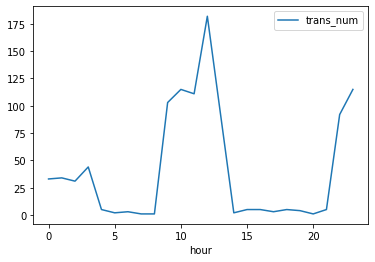

In [23]:
# Plot the fraudulant transactions hours


lines = hour_df.plot.line(y='trans_num')

In [18]:
# filter df for non-raudulant transactions for analysis
non_fraud_df = encode_df.loc[encode_df["is_fraud"]==0]
non_fraud_df

,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time,hour
0,2da90c7d74bd46a0caf3777415b3ebd3,fraud_Kirlin and Sons,10,2.86,1,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,1,2020-06-21 12:14:00,12
1,324cc204407e99f51b0d6ca0055005e7,fraud_Sporer-Keebler,10,29.84,0,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2,2020-06-21 12:14:00,12
2,c81755dbbbea9d5c77f094348a7579be,"fraud_Swaniawski, Nitzsche and Welch",5,41.28,0,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,3,2020-06-21 12:14:00,12
3,2159175b9efe66dc301f149d3d5abf8c,fraud_Haley Group,9,60.05,1,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,4,2020-06-21 12:15:00,12
4,57ff021bd3f328f8738bb535c302a31b,fraud_Johnston-Casper,13,3.19,1,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,5,2020-06-21 12:15:00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99494,8e73016814bf4279730e57501b12cbe8,fraud_Prohaska-Murray,2,42.64,0,Ranier,MN,56668,48.6031,-93.2977,136,Ceramics designer,1374829458,48.370165,-93.637741,0,99495,2020-07-26 09:04:00,9
99495,0921b3e8f54b5fd0ccaf37f1e21ded38,"fraud_Bernhard, Grant and Langworth",12,4.45,0,Clay Center,OH,43408,41.5686,-83.3632,269,Insurance underwriter,1374829524,42.375111,-83.889396,0,99496,2020-07-26 09:05:00,9
99496,aaedd515bc89983c238a15c577da516b,"fraud_Tillman, Dickinson and Labadie",2,47.99,0,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,1374829533,32.483791,-95.858607,0,99497,2020-07-26 09:05:00,9
99497,e6e8af7d35089bf183f13e9e03fdeca5,fraud_Dooley-Thompson,8,1.64,0,Republic,MI,49879,46.3680,-87.9938,1038,Armed forces training and education officer,1374829563,47.130904,-87.575362,0,99498,2020-07-26 09:06:00,9


In [24]:
# summarize non_fraud df by hour of transaction
# activity seems more evenly spread through day but gradually increases each hour and then tapers down after 8pm)
hour_df_nonfraud = non_fraud_df.groupby("hour").count()
hour_df_nonfraud



,trans_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Pers_ID,trans_date_trans_time
hour,,,,,,,,,,,,,,,,,,
0,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246
1,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258
2,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251
3,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225
4,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278
5,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335,3335
6,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272,3272
7,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291,3291
8,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242,3242


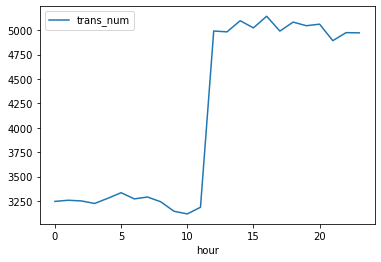

In [25]:
# Plot the non-fraudulant transactions hours


nonfraud_lines = hour_df_nonfraud.plot.line(y='trans_num')